# 1. Latar Belakang

    

Perusahaan Software as a Service (SaaS) B2B menjual produk perangkat lunak kepada pelanggan perusahaan di berbagai wilayah, seperti AMER, APJ, EMEA.

Dalam kegiatan penjualannya, perusahaan melayani berbagai jenis pelanggan, mulai dari SMB dan perusahaan besar lainnya. Setiap pelanggan memiliki nilai transaksi dan tingkat keuntungan yang berbeda-beda.

Permasalahan yang sering terjadi adalah tim penjualan belum mengetahui secara pasti pelanggan mana yang benar-benar memiliki potensi tinggi. Akibatnya, waktu dan usaha sering dihabiskan untuk pelanggan dengan nilai penjualan atau keuntungan yang rendah, bahkan pada beberapa kasus menyebabkan profit yang kecil atau negatif karena pemberian diskon yang terlalu besar.

Dengan memanfaatkan data penjualan SaaS yang tersedia, perusahaan dapat melihat pola berdasarkan wilayah, jenis pelanggan, produk, dan hasil transaksi. Analisis data ini diperlukan untuk membantu perusahaan menentukan prioritas pelanggan yang lebih menguntungkan.

Oleh karena itu, project ini dilakukan untuk menganalisis data penjualan SaaS guna mengidentifikasi pelanggan berpotensi tinggi sebagai dasar pengambilan keputusan dalam proses penjualan.

# 2. Rumusan Masalah
    

Berdasarkan latar belakang tersebut, rumusan masalah dalam project ini adalah:

1. Bagaimana karakteristik pelanggan SaaS B2B yang memiliki potensi penjualan dan tingkat keuntungan tinggi berdasarkan wilayah, jenis pelanggan, dan produk?

2. Wilayah mana (AMER, APJ, EMEA) yang memberikan kontribusi penjualan dan profit tertinggi bagi perusahaan SaaS?

3. Bagaimana perbedaan nilai transaksi dan profit antara segmen pelanggan SMB dan perusahaan besar?

4. Produk SaaS apa saja yang paling menguntungkan dan paling sering menghasilkan profit rendah akibat diskon?

5. Faktor apa yang paling berpengaruh dalam menentukan pelanggan berpotensi tinggi pada penjualan SaaS B2B?

6. Bagaimana hasil analisis data penjualan dapat digunakan untuk menentukan prioritas pelanggan dalam proses penjualan agar lebih efisien dan menguntungkan?

# 3.  Tujuan Project



Tujuan dari project ini adalah:

1. Menganalisis data penjualan SaaS B2B untuk memahami pola penjualan berdasarkan wilayah, jenis pelanggan, produk, dan hasil transaksi.

2. Mengidentifikasi karakteristik pelanggan yang memiliki potensi penjualan dan tingkat keuntungan tinggi.

3. Mengetahui wilayah, segmen pelanggan, dan produk yang memberikan kontribusi terbesar terhadap pendapatan dan profit perusahaan.

4. Mengidentifikasi faktor-faktor yang menyebabkan profit rendah atau negatif, khususnya yang berkaitan dengan pemberian diskon.

5. Memberikan insight berbasis data sebagai dasar pengambilan keputusan bagi tim penjualan dalam menentukan prioritas pelanggan yang lebih menguntungkan.

# 4.  Data Source

   


 Tahap ini bertujuan untuk memahami struktur, isi, dan karakteristik dataset penjualan SaaS sebelum analisis lebih lanjut dilakukan.

# 4.1 IMPORT LIBRARIES

In [ ]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For more interesting data visualization
import missingno as msno # For identifying and visualizing missing data
from datetime import datetime # For date manipulation
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

Berikut adalah deskripsi singkat dari setiap pustaka yang diimpor:

Pandas: Digunakan untuk manipulasi dan analisis data berbentuk tabel. Library ini menyediakan struktur data seperti DataFrame yang memudahkan proses pengolahan, pembersihan, dan analisis data.

NumPy: Library untuk komputasi numerik yang digunakan dalam operasi matematika pada array atau matriks serta perhitungan numerik lainnya.

Matplotlib.pyplot: Modul dari Matplotlib yang digunakan untuk membuat visualisasi data, seperti grafik garis, grafik batang, dan grafik sebar (scatter plot).

Seaborn: Library visualisasi data yang dibangun di atas Matplotlib dan digunakan untuk menampilkan grafik yang lebih informatif dan menarik, serta mendukung analisis statistik.

Missingno: Library yang digunakan untuk mengidentifikasi dan memvisualisasikan data yang hilang (missing values) dalam dataset melalui tampilan matriks, heatmap, atau grafik batang.

Datetime: Modul bawaan Python yang digunakan untuk mengelola data waktu dan tanggal, seperti mengubah format tanggal serta menghitung selisih waktu.

# DATA UNDERSTANDING

In [ ]:
# Digunakan untuk mengembalikan pengaturan tampilan Pandas ke default
# pd.reset_option('display.max_rows')

In [ ]:
# memunculkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
initialdata = pd.read_csv('SaaS-Sales.csv')
initialdata

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Data disimpan terlebih dahulu, karena dikhawatirkan data lama akan mengganggu analisis lebih lanjut.

In [ ]:
# Save DataFrame to new CSV file
initialdata.to_csv('SaaS-Sales_new.csv', index=False )#nomor baris tidak ikut disimpan ke file

In [ ]:
data = pd.read_csv('SaaS-Sales_new.csv')
data

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


**Penjelasan Kegunaan Setiap Kolom Dataset SaaS Sales :**

Row ID: Nomor urut data (identitas baris).

Order ID: Identitas unik setiap transaksi penjualan.

Order Date: Tanggal terjadinya transaksi penjualan.

Date Key: Format numerik dari tanggal untuk memudahkan analisis waktu.

Contact Name: Nama kontak pelanggan (informasi administratif).

Country: Negara asal pelanggan.

City: Kota pelanggan.

Region: Wilayah pelanggan (AMER, APJ, EMEA) untuk analisis performa penjualan per wilayah.

Subregion: Pembagian wilayah yang lebih detail.

Customer: Nama perusahaan pelanggan.

Customer ID: ID unik pelanggan untuk mencegah duplikasi data.

Industry: Jenis industri pelanggan.

Segment: Segmen pelanggan (SMB atau Enterprise).

Product: Produk SaaS yang dijual.

License: Jenis atau durasi lisensi produk.

Sales: Nilai penjualan (revenue).

Quantity: Jumlah produk atau lisensi yang dibeli.

Discount: Besaran diskon yang diberikan.

Profit: Keuntungan bersih dari transaksi.

Catatan penting bisnis SaaS

Sales ≠ Profit

Profit = Sales - Cost - Discount

Bisa sales tinggi tapi rugi → ini penting buat identifikasi customer potensial

# INFORMATION DATA TYPE

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

# CONCLUSSION DATA TYPE

Kesimpulan Data Type Dataset :
Dataset penjualan SaaS memiliki total 9.994 baris dan 19 kolom. Seluruh kolom tidak memiliki missing value (non-null).

Distribusi tipe data:

1. Object (12 kolom)
Digunakan untuk data kategorikal dan teks, seperti: Order ID, Order Date, Contact Name, Country, City, Region, Subregion, Customer, Industry, Segment, Poduct, License.

2. Integer (4 kolom-int64)
Digunakan untuk data numerik diskrit: Row ID, Date Key, Customer ID, Quantity.

3. Float (3 kolom-float64)
Digunakan untuk data numerik kontinu: Sales, Discount, Profit.

# DATA CLEANING

### Ubah Format Tanggal

In [ ]:
df = pd.read_csv('SaaS-Sales.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])


## Cek Duplikat

In [ ]:
df.duplicated().sum()


np.int64(0)

## Cek nilai negatif (valid tapi perlu dicatat)

In [ ]:
(df['Profit'] < 0).sum()


np.int64(1871)

# STATISTIK DESKRIPTIF

In [ ]:
df[['Sales','Profit','Quantity','Discount']].describe()


,Sales,Profit,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


Rata-rata sales per transaksi

Profit minimum negatif → indikasi promo agresif

Discount max tinggi → potensi margin erosion

# Identifikasi High-Potential Customers (CORE PROJECT)

## Agregasi per Customer

In [ ]:
customer_perf = df.groupby(['Customer','Segment','Region']).agg({
    'Sales':'sum',
    'Profit':'sum',
    'Order ID':'nunique',
    'Quantity':'sum'
}).reset_index()

customer_perf.rename(columns={'Order ID':'Total_Orders'}, inplace=True)


Definisi High-Potential Customer, Customer dengan:

Total Sales tinggi

Total Profit positif & besar

Order berulang

In [ ]:
customer_perf.sort_values(
    by=['Profit','Sales'],
    ascending=False
).head(10)


,Customer,Segment,Region,Sales,Profit,Total_Orders,Quantity
209,Coca-Cola,Strategic,APJ,18437.138,8745.0635,2,24
452,Mondelez International,SMB,AMER,21412.708,7621.2931,24,232
77,Anthem,SMB,EMEA,19012.164,6550.1946,23,200
413,Lukoil,SMB,EMEA,17547.146,5502.2589,10,91
698,Valero Energy,SMB,AMER,11143.205,4854.0820,8,46
664,Trafigura Group,Enterprise,EMEA,14525.828,4801.5784,7,42
403,Lowes,SMB,APJ,13434.120,4342.1201,11,70
743,Walt Disney,Strategic,EMEA,12520.088,3792.5933,13,93
49,Alphabet,SMB,AMER,10507.752,3628.6588,7,76
308,Glencore,Enterprise,EMEA,7229.102,3271.2320,7,70


# Data Visualization (Python)

## Distribusi Sales

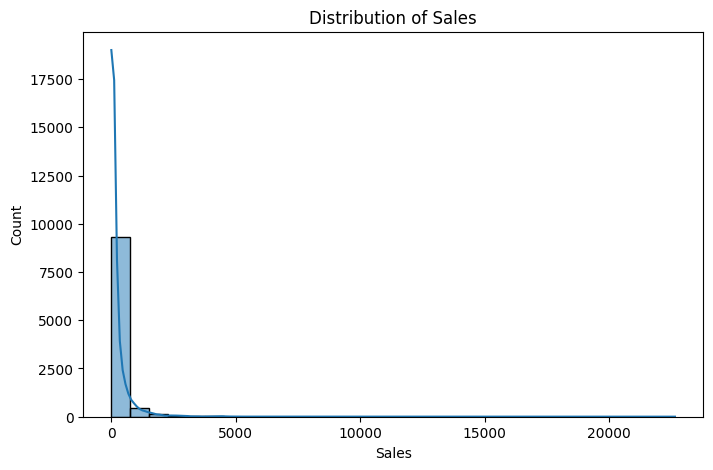

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()


Grafik distribusi sales menunjukkan bahwa sebagian besar transaksi memiliki nilai penjualan yang relatif rendah. Hanya sebagian kecil transaksi yang memiliki nilai sales sangat tinggi, yang ditunjukkan oleh ekor panjang di sisi kanan grafik.

## Profit per Segment

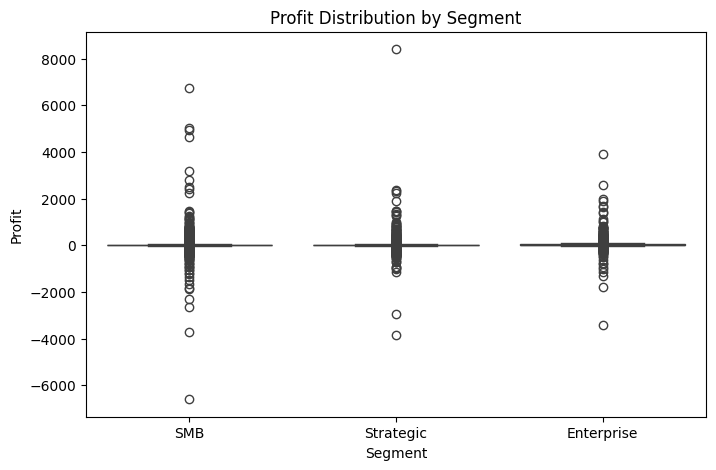

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Segment', y='Profit')
plt.title('Profit Distribution by Segment')
plt.show()


Grafik profit per segment menunjukkan bahwa setiap segment memiliki variasi profit yang cukup besar. Segment Strategic memiliki potensi keuntungan tertinggi, namun tetap terdapat transaksi yang merugikan. Segment SMB menunjukkan risiko kerugian yang lebih tinggi dibandingkan segment lainnya.

Meskipun beberapa segment menunjukkan potensi profit yang tinggi, masih ditemukan transaksi dengan nilai profit negatif. Oleh karena itu, diperlukan analisis lebih lanjut terhadap customer yang menghasilkan penjualan tinggi namun merugikan.

## 10 Pelanggan Teratas Berdasarkan Keuntungan

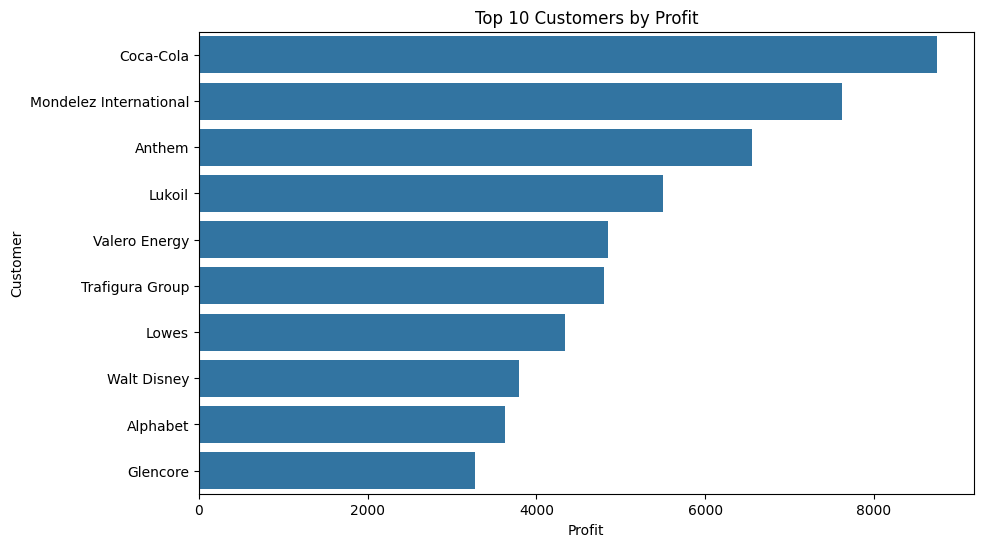

In [ ]:
top10 = customer_perf.nlargest(10, 'Profit')

plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='Customer', x='Profit')
plt.title('Top 10 Customers by Profit')
plt.show()


**Kesimpulan :**

Berdasarkan hasil analisis, customer dengan segment Strategic dan region tertentu menunjukkan kontribusi profit yang signifikan meskipun volume transaksi tidak selalu tinggi. Hal ini menunjukkan bahwa fokus pada customer dengan margin tinggi lebih efektif dibandingkan hanya meningkatkan volume penjualan.

# Customer dengan Penjualan Tinggi tetapi Merugikan

In [ ]:
customer_loss = df.groupby('Customer')[['Sales','Profit']].sum().reset_index()

customer_loss = customer_loss[
    (customer_loss['Sales'] > customer_loss['Sales'].median()) &
    (customer_loss['Profit'] < 0)
]

customer_loss.head(10)


,Customer,Sales,Profit
5,Allstate,39941.6400,-2796.2935
19,Bosch,25444.9990,-1823.7794
44,HSBC Holdings,22703.8405,-104.4022
63,Morgan Stanley,28631.4500,-361.8099


Sales di atas rata-rata Tapi Profit minus.
Analisis tambahan dilakukan untuk mengidentifikasi customer dengan nilai penjualan tinggi namun menghasilkan keuntungan negatif. Hasil ini menunjukkan bahwa tingginya penjualan tidak selalu berbanding lurus dengan profitabilitas.